In [1]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
orig_img = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\scans DICOM\NLD-AMPH-0072.dcm')  ##Check frame 80 for artifact and put it in presentation
orig_img_pixel_data = sitk.GetArrayFromImage(orig_img)

In [29]:
preproc_r = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\imagesTr\NLDAMPH0072_1_frame120_022_0000.nii.gz')
preproc_g = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\imagesTr\NLDAMPH0072_1_frame120_022_0001.nii.gz')
preproc_b = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\imagesTr\NLDAMPH0072_1_frame120_022_0002.nii.gz')

preproc_r_pixel_data = sitk.GetArrayFromImage(preproc_r)
preproc_g_pixel_data = sitk.GetArrayFromImage(preproc_g)
preproc_b_pixel_data = sitk.GetArrayFromImage(preproc_b)

In [32]:
merged_preproc = np.zeros((preproc_r_pixel_data.shape[1], preproc_r_pixel_data.shape[2], 3))

merged_preproc[:,:,0] = preproc_r_pixel_data
merged_preproc[:,:,1] = preproc_g_pixel_data
merged_preproc[:,:,2] = preproc_b_pixel_data


In [11]:
orig_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\segmentations ORIGINALS\NLD-AMPH-0072.nii.gz')
orig_seg_pixel_data = sitk.GetArrayFromImage(orig_seg)

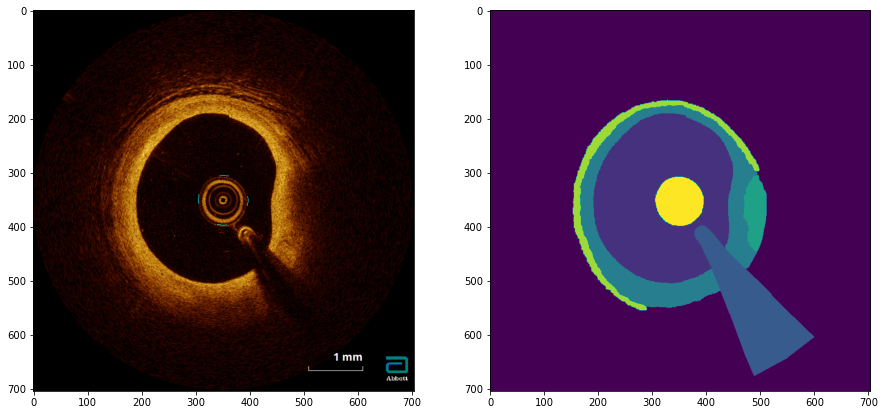

In [28]:
fig, axes = plt.subplots(1,2, figsize=(15, 15))

frame = 120

axes[0].imshow(orig_img_pixel_data[frame,:,:,:])
axes[1].imshow(orig_seg_pixel_data[frame,:,:])

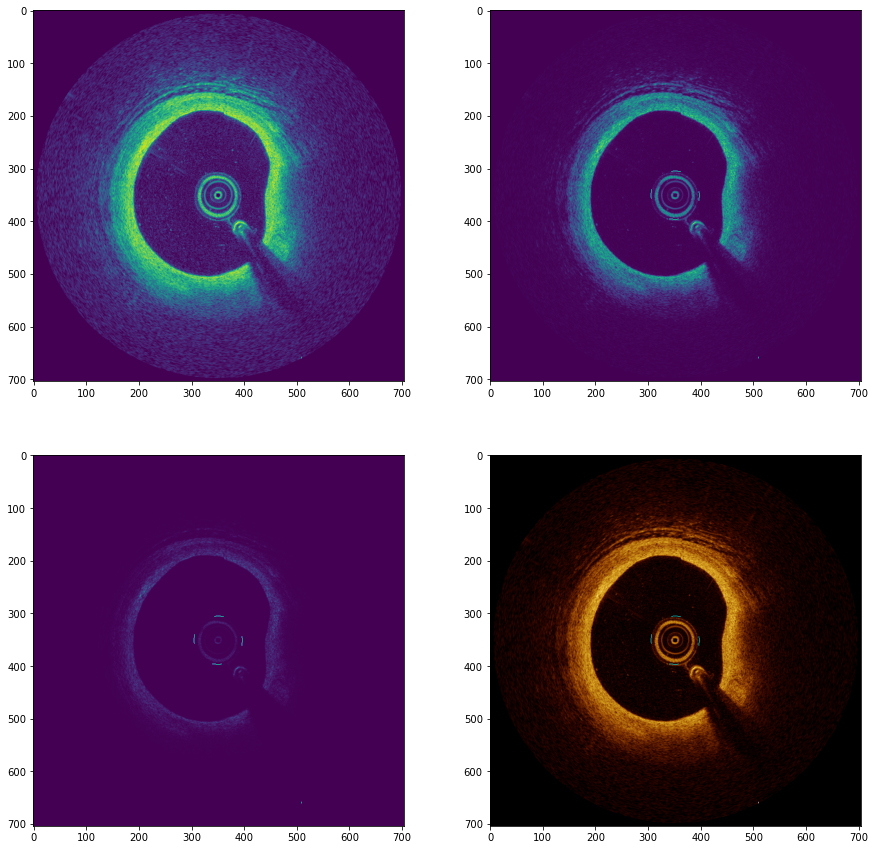

In [36]:
fig, axes = plt.subplots(2,2, figsize=(15, 15))

axes = axes.flatten()

axes[0].imshow(preproc_r_pixel_data[0])
axes[1].imshow(preproc_g_pixel_data[0])
axes[2].imshow(preproc_b_pixel_data[0])
axes[3].imshow(merged_preproc.astype(np.int32))